<a href="https://colab.research.google.com/github/AnHaiTrinh/handson-ml/blob/main/DimensionReduction_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import sklearn

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi /2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [ ]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1, c2 = Vt.T[:, 0], Vt.T[:, 1]

In [ ]:
m, n = X.shape
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [ ]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [ ]:
W = np.c_[c1, c2]
X2D = X_centered.dot(W)

In [ ]:
X2D_using_svd = X2D

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [ ]:
X2D[:5]

array([[ 0.37311755, -0.50812251],
       [-1.02109472, -0.30087396],
       [-0.92007284, -0.10789396],
       [ 0.81958685, -0.35395571],
       [ 0.92677409,  0.56282397]])

In [ ]:
X2D_using_svd[: 5]

array([[-0.37311755,  0.50812251],
       [ 1.02109472,  0.30087396],
       [ 0.92007284,  0.10789396],
       [-0.81958685,  0.35395571],
       [-0.92677409, -0.56282397]])

In [ ]:
np.allclose(X2D, X2D_using_svd)

False

In [ ]:
X3D_inverse = pca.inverse_transform(X2D)
np.allclose(X3D_inverse, X)

False

In [ ]:
np.mean(np.sum((X - X3D_inverse) ** 2, axis=1))

0.008253034674220786

In [ ]:
X3D_inverse_using_svd = X2D_using_svd.dot(Vt[:2, :])

In [ ]:
np.allclose(X3D_inverse - pca.mean_, X3D_inverse_using_svd )

True

In [ ]:
pca.components_

array([[ 0.93619451,  0.29829467,  0.18590357],
       [ 0.33794093, -0.90931262, -0.24278897]])

In [ ]:
Vt[:2]

array([[-0.93619451, -0.29829467, -0.18590357],
       [-0.33794093,  0.90931262,  0.24278897]])

In [ ]:
pca.explained_variance_ratio_

array([0.84275314, 0.14861543])

In [ ]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

In [ ]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

In [ ]:
C.shape

(2, 3)

In [ ]:
R.shape

(3, 3)

In [ ]:
R


array([[ 0.99066423, -0.02803212,  0.09199357],
       [-0.02803212,  0.91582916,  0.27622511],
       [ 0.09199357,  0.27622511,  0.09350662]])

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_11936\4083098209.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([X[i][0], X3D_inverse[i][0]], [X[i][1], X3D_inverse[i][1]], [X[i][2], X3D_inverse[i][2]], "k-", color="#505050")


(-1.0, 1.0)

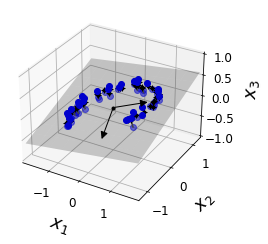

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inverse[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inverse[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")

ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inverse[i, 2]:
        ax.plot([X[i][0], X3D_inverse[i][0]], [X[i][1], X3D_inverse[i][1]], [X[i][2], X3D_inverse[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inverse[i][0]], [X[i][1], X3D_inverse[i][1]], [X[i][2], X3D_inverse[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inverse[:, 0], X3D_inverse[:, 1], X3D_inverse[:, 2], "k+")
ax.plot(X3D_inverse[:, 0], X3D_inverse[:, 1], X3D_inverse[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

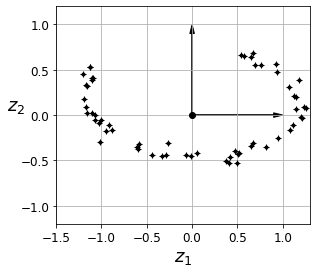

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2)

(-12.0, 15.0)

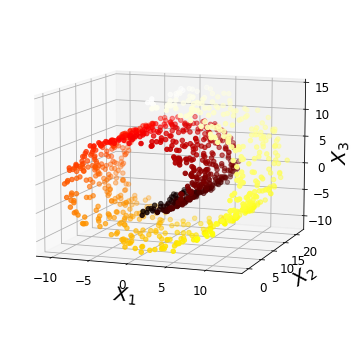

In [ ]:
axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=mpl.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$X_1$", fontsize=20)
ax.set_ylabel("$X_2$", fontsize=20)
ax.set_zlabel("$X_3$", fontsize=20)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

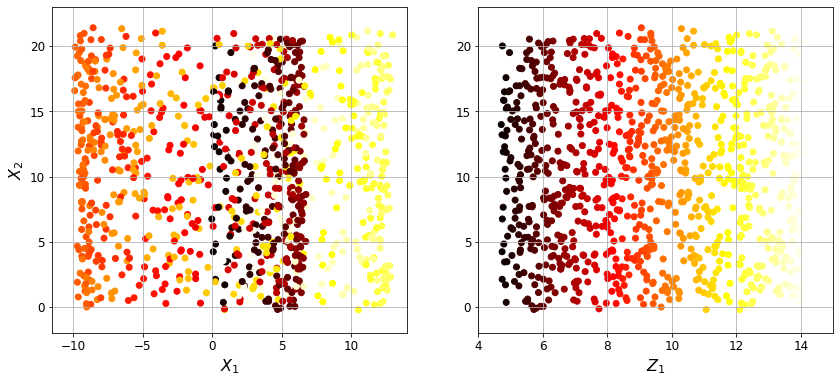

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=mpl.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$X_1$", fontsize=16)
plt.ylabel("$X_2$", fontsize=16)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=mpl.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$Z_1$", fontsize=16)
plt.grid(True)

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [ ]:
from sklearn.model_selection import train_test_split
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

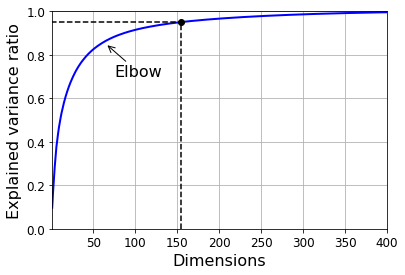

In [ ]:
plt.plot(np.arange(1, len(cumsum) + 1), cumsum, 'b-', linewidth=2)
plt.plot(d, cumsum[d-1], 'ko')
plt.plot([d, d], [0, cumsum[d-1]], 'k--')
plt.plot([0, d], [cumsum[d-1], cumsum[d-1]], 'k--')
plt.annotate("Elbow", xy=(65, 0.85), xytext=(75, 0.7), arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.xlabel("Dimensions", fontsize=16)
plt.ylabel("Explained variance ratio", fontsize=16)
plt.axis([1, 400, 0, 1])
plt.grid(True)


In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
pca.n_components_

154

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.950349970207861

In [ ]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    
    n_rows = (len(instances) - 1) // images_per_row + 1


    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.r_[instances, np.zeros((n_empty, size * size))]

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

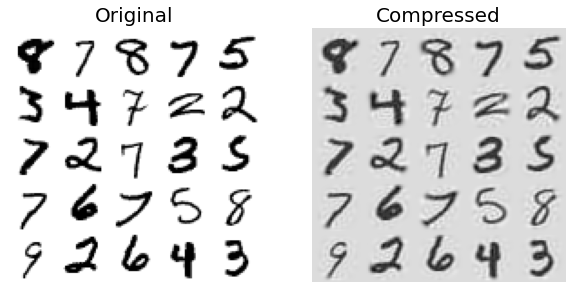

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_digits(X_train[::2300])
plt.title("Original", fontsize=20)
plt.subplot(122)
plot_digits(X_recovered[::2300])
plt.title("Compressed", fontsize=20)

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_randomly_reduced = rnd_pca.fit_transform(X_train)
np.allclose(X_randomly_reduced, X_reduced)

False

In [ ]:
np.mean(np.sum(np.square(X_randomly_reduced - X_reduced), axis=1))

130023.71509619465

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
ipca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    ipca.partial_fit(X_batch)
    
X_reduced_by_ipca = ipca.transform(X_train)

In [ ]:
X_recovered_from_ipca = ipca.inverse_transform(X_reduced_by_ipca)
np.allclose(X_reduced, X_reduced_by_ipca)

False

In [ ]:
np.mean(np.sum(np.square(X_reduced_by_ipca - X_reduced), axis=1))

5116521.807263406

Text(0.5, 1.0, 'Compressed by IPCA')

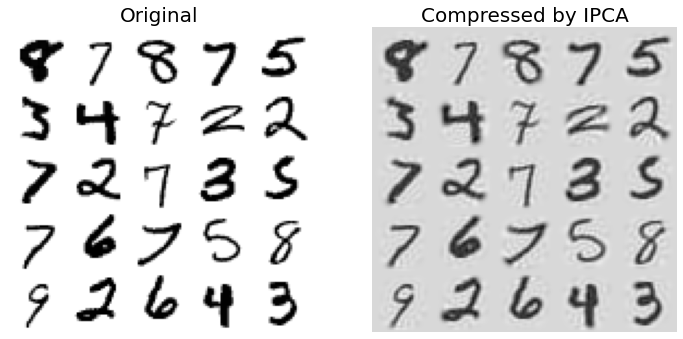

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_digits(X_train[::2300])
plt.title("Original", fontsize=20)
plt.subplot(122)
plot_digits(X_recovered_from_ipca[::2300])
plt.title("Compressed by IPCA", fontsize=20)


In [ ]:
np.allclose(pca.mean_, ipca.mean_)

True

In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2)

In [ ]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [ ]:
linear_pca = KernelPCA(n_components=2, kernel='linear')
X_reduced_linear = linear_pca.fit_transform(X)

In [ ]:
sigmoid_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1)
X_reduced_sigmoid = sigmoid_pca.fit_transform(X)

Text(0.5, 1.0, 'Sigmoid Kernel')

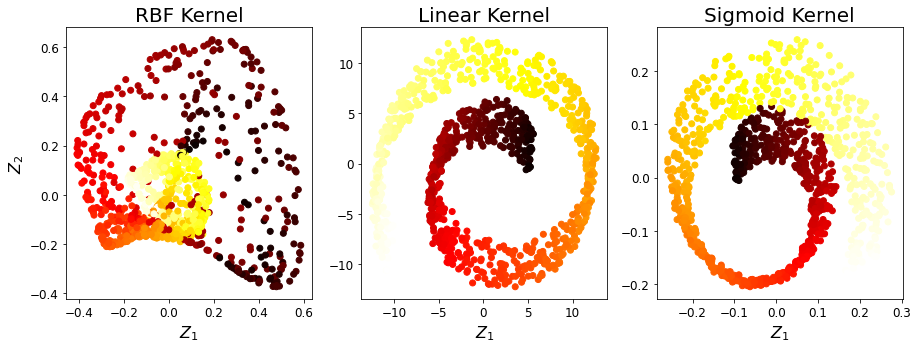

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=mpl.cm.hot)
plt.xlabel("$Z_1$", fontsize=16)
plt.ylabel("$Z_2$", fontsize=16)
plt.title("RBF Kernel", fontsize=20)
plt.subplot(132)
plt.scatter(X_reduced_linear[:, 0], X_reduced_linear[:, 1], c=t, cmap=mpl.cm.hot)
plt.xlabel("$Z_1$", fontsize=16)
plt.title("Linear Kernel", fontsize=20)
plt.subplot(133)
plt.scatter(X_reduced_sigmoid[:, 0], X_reduced_sigmoid[:, 1], c=t, cmap=mpl.cm.hot)
plt.xlabel("$Z_1$", fontsize=16)
plt.title("Sigmoid Kernel", fontsize=20)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

y = t > 6.9

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

params_grid = [{'kpca__kernel':['rbf', 'sigmoid'],
                'kpca__gamma': np.linspace(0.03, 0.05, 10)
               }]
grid_search = GridSearchCV(clf, params_grid, cv=3)
grid_search.fit(X, y)
grid_search.best_params_

{'kpca__gamma': 0.04555555555555556, 'kpca__kernel': 'rbf'}

In [ ]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced_best = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced_best)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_preimage, X)

32.634572173874695

Text(0, 0.5, '$Z_2$')

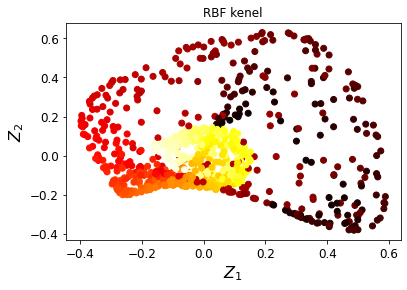

In [ ]:
plt.scatter(X_reduced_best[:, 0], X_reduced_best[:, 1], c=t, cmap=mpl.cm.hot)
plt.title("RBF kenel")
plt.xlabel("$Z_1$",fontsize=16)
plt.ylabel("$Z_2$", fontsize=16)

[Text(-8.0, 0, ''),
 Text(-6.0, 0, ''),
 Text(-4.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, '')]

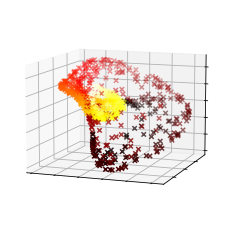

In [ ]:
ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_preimage[:, 0], X_preimage[:, 1], X_preimage[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

Text(0.5, 1.0, 'Unroll swiss roll using LLE')

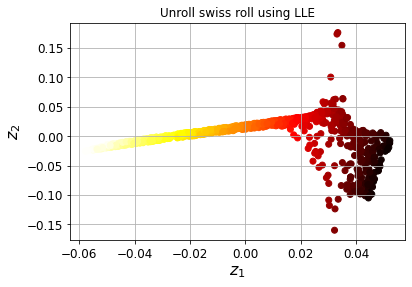

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=mpl.cm.hot)
plt.xlabel("$z_1$", fontsize=16)
plt.ylabel("$z_2$", fontsize=16)
plt.grid(True)
plt.title("Unroll swiss roll using LLE")

In [ ]:
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

mds = MDS(n_components=2)
X_reduced_mds = mds.fit_transform(X)

isomap = Isomap(n_components=2)
X_reduced_isomap = mds.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=25)
X_reduced_tsne = mds.fit_transform(X)

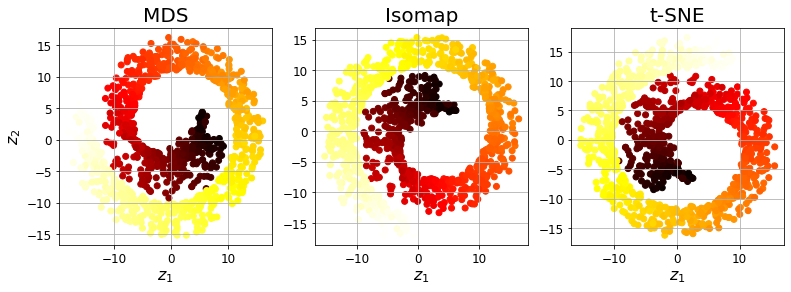

In [ ]:
plt.figure(figsize=(13,4))
plt.subplot(131)
plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=t, cmap=mpl.cm.hot)
plt.xlabel("$z_1$", fontsize=16)
plt.ylabel("$z_2$", fontsize=16)
plt.title("MDS", fontsize=20)
plt.grid(True)
plt.subplot(132)
plt.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], c=t, cmap=mpl.cm.hot)
plt.xlabel("$z_1$", fontsize=16)
plt.title("Isomap", fontsize=20)
plt.grid(True)
plt.subplot(133)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap=mpl.cm.hot)
plt.xlabel("$z_1$", fontsize=16)
plt.title("t-SNE", fontsize=20)
plt.grid(True)

In [ ]:
X_train = mnist['data'][:60000]
X_test = mnist['data'][60000:]
y_train = mnist['target'][:60000]
y_test = mnist['target'][60000:]

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [ ]:
start_time = time.time()
forest_clf.fit(X_train, y_train)
end_time = time.time()
print("Training time without dimension reduction(s):", end_time - start_time)

Training time without dimension reduction\(s\): 1225.7991585731506


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [ ]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [ ]:
forest_clf2 = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [ ]:
start_time = time.time()
forest_clf.fit(X_train_reduced, y_train)
end_time = time.time()
print("Training time with dimension reduction(s):", end_time - start_time)

Training time with dimension reduction\(s\): 47.78402614593506


In [ ]:
y_pred = forest_clf.predict(pca.transform(X_test))
accuracy_score(y_test, y_pred)

0.9481

In [ ]:
pca.n_components_

154

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
start = time.time()
log_reg.fit(X_train, y_train)
end = time.time()
print("Softmax training took {:.2f} s".format(end-start))

Softmax training took 27.15 s


C:\Users\Thinkpad\jupyter\handson_ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

In [ ]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
start = time.time()
log_reg2.fit(X_train_reduced, y_train)
end = time.time()
print("Training softmax with PCA took {:.2f} s".format(end-start))

Training softmax with PCA took 9.00 s


C:\Users\Thinkpad\jupyter\handson_ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = log_reg2.predict(pca.transform(X_test))
accuracy_score(y_test, y_pred)

0.9201

In [ ]:
idx = np.random.permutation(60000)[:10000]
X = mnist.data[idx]
y = mnist.target[idx]

In [ ]:
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)

C:\Users\Thinkpad\jupyter\handson_ML\env\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Thinkpad\jupyter\handson_ML\env\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


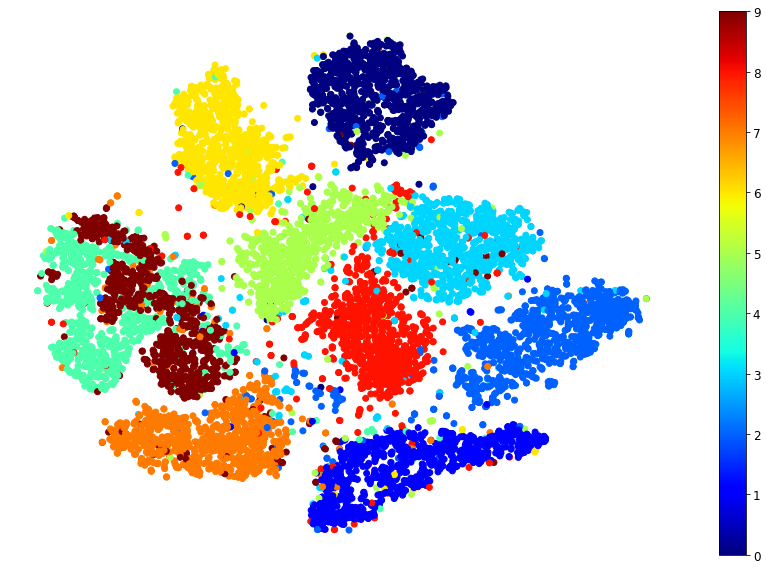

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='jet')
plt.axis("off")
plt.colorbar()

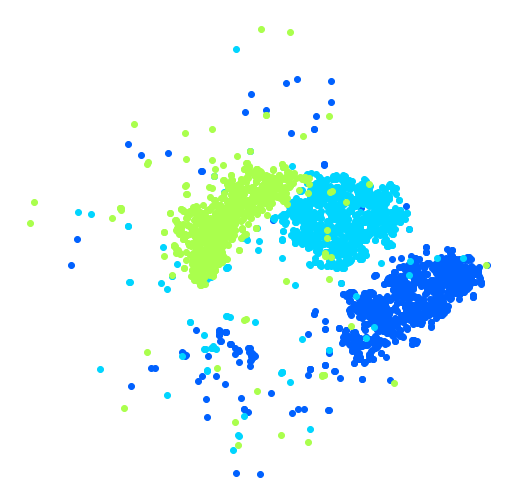

In [ ]:
plt.figure(figsize=(9, 9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')


In [ ]:
idx = (y==2) | (y==3) |(y==5)
X_subset = X[idx]
y_subset = y[idx]
X_subset_reduced = tsne.fit_transform(X_subset)

C:\Users\Thinkpad\jupyter\handson_ML\env\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Thinkpad\jupyter\handson_ML\env\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(-75.88150634765626, 89.3148406982422, -69.77335529327392, 57.729146766662595)

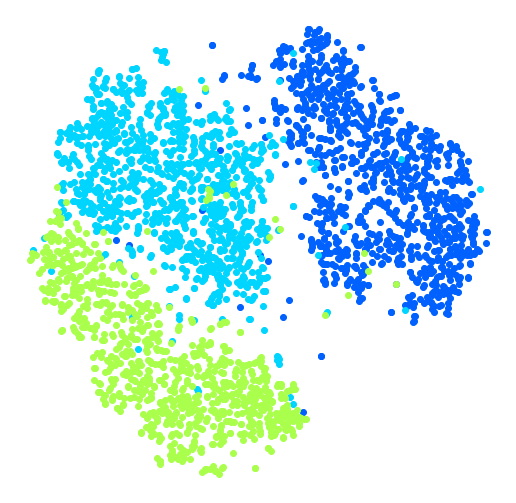

In [ ]:
plt.figure(figsize=(9, 9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

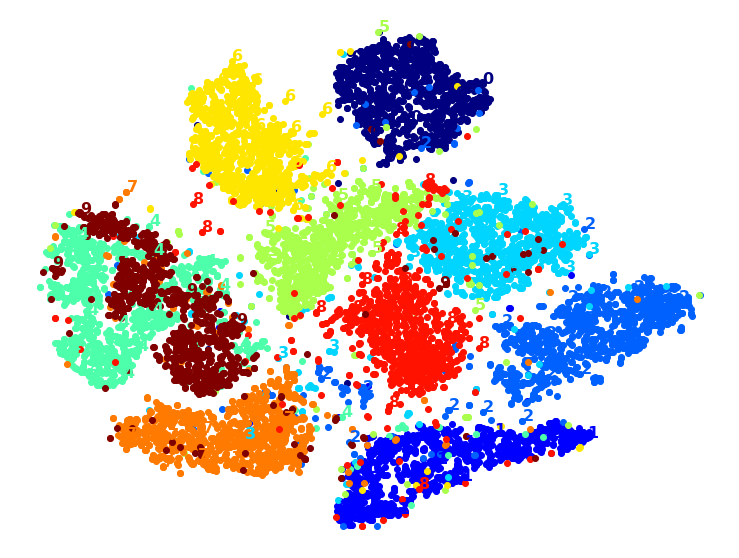

In [ ]:
plot_digits(X_reduced, y)

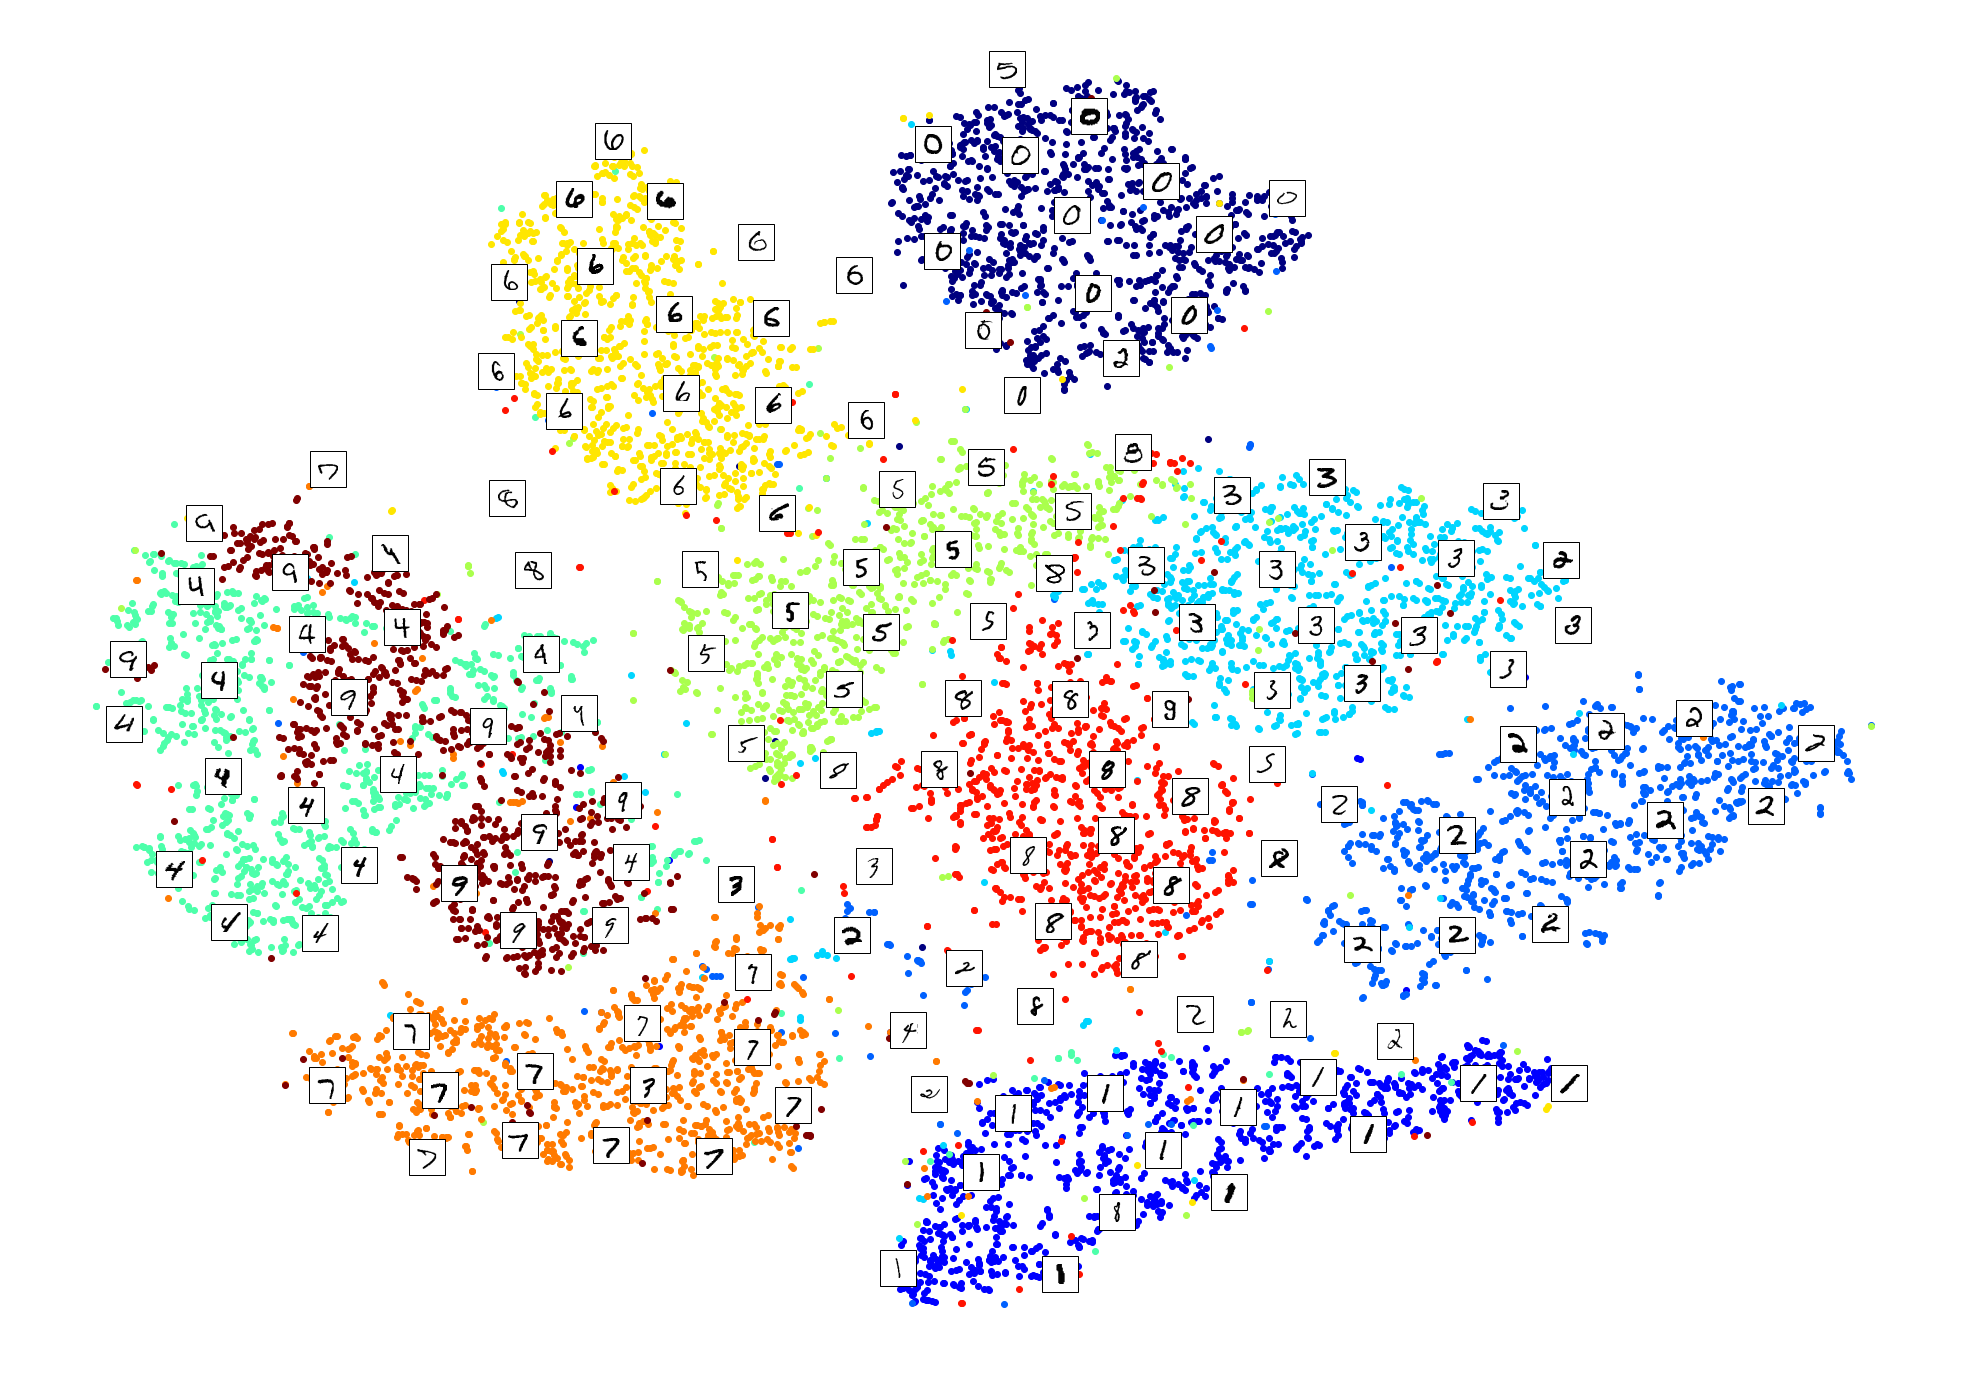

In [ ]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

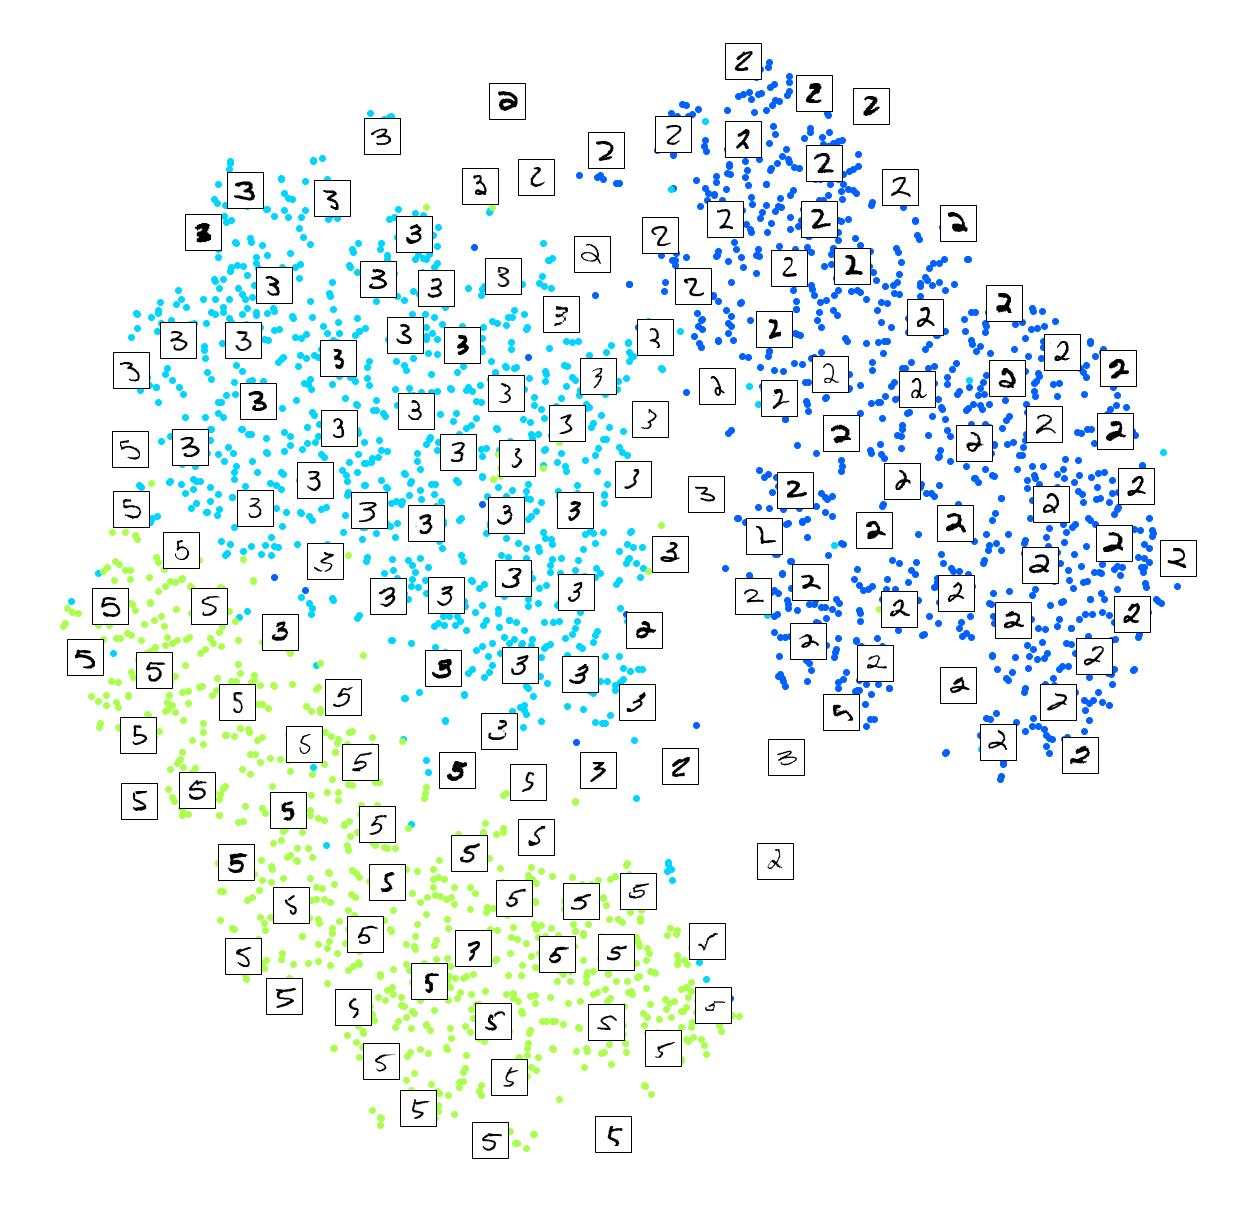

In [ ]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))